## Anticipating Hospital Admissions from the Emergency Department (Data Wrangling and EDA)

### 1. Problem Identification

#### 1.1. Problem Statement

Most visits to the emergency department (ED) conclude with the patient being discharged, yet these departments stand out as the primary gateway for hospital admissions. When patients arrive at the ED, they undergo a critical sorting process known as "triage," which determines the urgency of their medical needs. This essential task is usually carried out by a skilled member of the nursing staff who assesses various factors, including the patient's demographic information, their principal complaint, and vital signs. After this initial evaluation, the patient is seen by a medical provider who formulates an initial care plan tailored to their specific situation. Based on this assessment, the provider ultimately makes a recommendation regarding the patient’s next steps, which in this study focuses on whether the patient should be admitted to the hospital or discharged to continue their recovery elsewhere.

The main goal for this project is to predict hospital admissions at the time of ED triage by using patient demographics and information gathered during triage.

#### 1.2. Dataset Description

The dataset includes all adult emergency department visits from March 2014 to July 2017 at one academic and two community emergency rooms that resulted in either admission or discharge. A total of 972 variables were collected for each patient visit. In this study, we only consider the demographic information and information gathered during the triage:

**Demographics:**
- ``age``
- ``gender``
- ``ethnicity``
- ``race``
- ``language``
- ``religion``
- ``marital status``
- ``employment status``
- ``insurance status``

**Triage and Hospital Usage:**
- ``dep_name``: presenting hospital (recoded into A, B, C)
- ``esi``: ESI level determined by triage nurse
- ``disposition``: admission or discharge
- ``arrivalmode``: ambulance, walk-in, car, etc.
- ``arrivalmonth``: month of arrival (Jan-Dec)
- ``arrivalday``: day of arrival (Mon-Sun)
- ``arrivalhour_bin``: hour of arrival, binned to 4-hour timeframes (23-02, 03-06, etc.)
- ``triage_vital_hr``: heart rate recorded at triage
- ``triage_vital_sbp``: systolic blood pressure recorded at triage
- ``triage_vital_dbp``: diastolic blood pressure recorded at triage
- ``triage_vital_rr``: respiratory rate recorded at triage
- ``triage_vital_o2``: O2 saturation recorded at triage
- ``triage_vital_o2_device``: presence of supplementary O2 device at triage
- ``triage_vital_temp``: temperature recorded at triage
- ``n_edvisits``: number of ED visits within the past year
- ``n_admissions``: number of in-patient admissions within the past year
- ``previousdispo``: disposition of the patient's last visit to the ED
- ``n_surgeries``: number of surgeries and procedures within the past year

The dataset is available at: [Admission Prediction Dataset](https://github.com/yaleemmlc/admissionprediction/tree/master/Results)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 **Load the dataset:**
The dataset is .rdata so we need to install packages to transfer this data to pandas DataFrame

In [3]:
# Install PyreadR
!pip install pyreadr -q
import pandas as pd
import pyreadr

In [5]:
result = pyreadr.read_r("5v_cleandf.RData")

In [7]:
df = result['df'] # Convert R data to pandas DataFrame

df.head()

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,B,4,40,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,...,0,0,0,0,0,0,0,0,0,0
1,B,4,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
2,B,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
3,A,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
4,A,3,84,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Columns: 972 entries, dep_name to cc_wristpain
dtypes: category(16), float64(753), int32(2), object(201)
memory usage: 4.0+ GB


The dataset contains numerous variables and columns, as indicated by the DataFrame information. For our analysis, we will focus only on the specific variables of interest. We will create a new DataFrame called `data` that includes only these selected features for our study.

In [16]:
featureList = [  'dep_name',
 'esi',
 'age',
 'gender',
 'ethnicity',
 'race',
 'lang',
 'religion',
 'maritalstatus',
 'employstatus',
 'insurance_status',
 'disposition','arrivalmode',
 'arrivalmonth',
 'arrivalday',
 'arrivalhour_bin', 'triage_vital_hr', 'previousdispo',
 'triage_vital_sbp',
 'triage_vital_dbp',
 'triage_vital_rr',
 'triage_vital_o2',
 'triage_vital_o2_device',
 'triage_vital_temp','n_edvisits',
 'n_admissions','n_surgeries']

data = df[featureList]
data.to_csv("data_reduced.csv")

In [26]:
data = pd.read_csv("data_reduced.csv") # Save the reduced data locally. 

In [28]:
data.head()

,Unnamed: 0,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,...,previousdispo,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions,n_surgeries
0,0,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,NaN,Single,...,No previous dispo,146.0,85.0,18.0,97.0,0.0,97.0,0,0,1.0
1,1,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,No previous dispo,125.0,77.0,16.0,NaN,0.0,98.0,0,0,2.0
2,2,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,Discharge,134.0,78.0,16.0,97.0,NaN,97.8,1,0,2.0
3,3,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,Discharge,171.0,92.0,18.0,98.0,0.0,NaN,2,0,2.0
4,4,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,...,Discharge,133.0,72.0,18.0,97.0,0.0,98.4,1,0,5.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560486 entries, 0 to 560485
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              560486 non-null  int64  
 1   dep_name                560486 non-null  object 
 2   esi                     558029 non-null  float64
 3   age                     560475 non-null  float64
 4   gender                  560486 non-null  object 
 5   ethnicity               560486 non-null  object 
 6   race                    560460 non-null  object 
 7   lang                    560486 non-null  object 
 8   religion                425288 non-null  object 
 9   maritalstatus           560486 non-null  object 
 10  employstatus            560486 non-null  object 
 11  insurance_status        560486 non-null  object 
 12  disposition             560486 non-null  object 
 13  arrivalmode             538602 non-null  object 
 14  arrivalmonth        

## **Check for missing values:**
Upon examining the data, we notice there are many ``NaN`` entries.

In [32]:
data.isnull().sum()

Unnamed: 0                     0
dep_name                       0
esi                         2457
age                           11
gender                         0
ethnicity                      0
race                          26
lang                           0
religion                  135198
maritalstatus                  0
employstatus                   0
insurance_status               0
disposition                    0
arrivalmode                21884
arrivalmonth                   0
arrivalday                     0
arrivalhour_bin                0
triage_vital_hr           166052
previousdispo                  0
triage_vital_sbp          167904
triage_vital_dbp          168063
triage_vital_rr           170487
triage_vital_o2           271317
triage_vital_o2_device    226855
triage_vital_temp         182985
n_edvisits                     0
n_admissions                   0
n_surgeries                    0
dtype: int64

### Missing values: ``age``
To determine how to handle the missing values in "age," we should first examine the percentage of missing values as well as the distribution of the "age" variable.

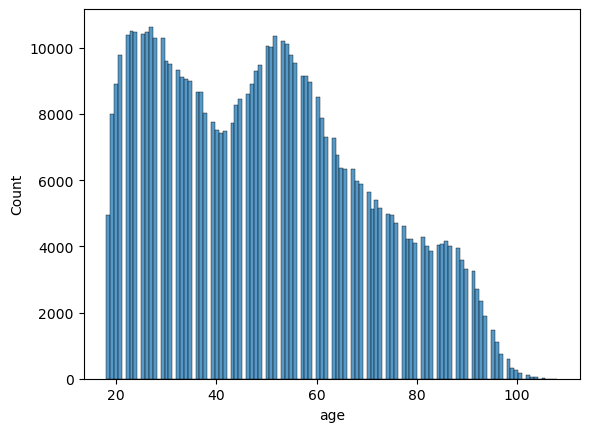

In [49]:
sns.histplot(data = data, x = 'age')
plt.show()

In [36]:
print(f"The percentage of missing data at the column 'age' is {(data['age'].isnull().sum()/len(data.age))*100}.")

The percentage of missing data at the column 'age' is 0.001962582473068016.


Since the percentage is very small, it is acceptable to replace the missing values with the mean of the ages.

In [38]:
data['age'] = data['age'].fillna(data['age'].mean())

print(data['age'].isnull().sum())

0


### Missing values: ``esi``
The Emergency Severity Index (ESI) is a triage tool used in emergency departments (ED) to categorize patients based on the severity of their condition and the resources they are likely to require. It helps prioritize patients for treatment, ensuring that those with the most critical needs receive care first. The ESI levels range from 1 to 5, with 1 being the most urgent and 5 being the least urgent.

In [40]:
(data['esi'].isnull().sum()/len(data['esi']))*100

0.4383695578480105

Intuitively, "esi" is an important factor in our analysis. We use the "KNNImputer" to fill the NaN data with the mean of their 10 closest neighbors.

In [46]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
data[['esi']] = imputer.fit_transform(data[['esi']])


In [51]:
data['esi'].isnull().sum()

0

### Missing values: triage information.

For ``triage_vital_hr``   the number of missing values is         166052,
``triage_vital_sbp``        167904,
``triage_vital_dbp``          168063,
``triage_vital_rr``           170487,
``triage_vital_o2 ``          271317,
``triage_vital_o2_device``    226855,
``triage_vital_temp ``        182985, we verify how many of them are missing in all cases.

In [55]:
check_columns = ['triage_vital_hr',
'triage_vital_sbp',       
'triage_vital_dbp',    
'triage_vital_rr',       
'triage_vital_o2',         
'triage_vital_o2_device',  
'triage_vital_temp']

(data[check_columns].isnull().all(axis=1)).sum()

164487

We discard them as if they did not provide any triage information; they are not worth retaining.

In [58]:
data1 = data[~data[check_columns].isnull().all(axis=1)]
data1[check_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 395999 entries, 0 to 560484
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   triage_vital_hr         394434 non-null  float64
 1   triage_vital_sbp        392582 non-null  float64
 2   triage_vital_dbp        392423 non-null  float64
 3   triage_vital_rr         389999 non-null  float64
 4   triage_vital_o2         289169 non-null  float64
 5   triage_vital_o2_device  333631 non-null  float64
 6   triage_vital_temp       377501 non-null  float64
dtypes: float64(7)
memory usage: 24.2 MB


In [60]:
data1.isnull().sum()

Unnamed: 0                     0
dep_name                       0
esi                            0
age                            0
gender                         0
ethnicity                      0
race                          17
lang                           0
religion                  101601
maritalstatus                  0
employstatus                   0
insurance_status               0
disposition                    0
arrivalmode                 8387
arrivalmonth                   0
arrivalday                     0
arrivalhour_bin                0
triage_vital_hr             1565
previousdispo                  0
triage_vital_sbp            3417
triage_vital_dbp            3576
triage_vital_rr             6000
triage_vital_o2           106830
triage_vital_o2_device     62368
triage_vital_temp          18498
n_edvisits                     0
n_admissions                   0
n_surgeries                    0
dtype: int64

### Missing values: ``triage_vital_o2``

In [65]:
print(f"The percentage of missing `triage_vital_o2` is {(data['triage_vital_o2'].isnull().sum()/len(data['esi']))*100}.")

The percentage of missing `triage_vital_o2` is 48.40745353139953.


We compare the ``disposition`` percentage of the missing values in ``triage_vital_o2``comparison with the whole data. As it can be seen the percentages are the same. 

In [77]:
print(len(data1[(data1['triage_vital_o2'].isnull()) & (data1['disposition'] == 'Admit')])/data1['triage_vital_o2'].isnull().sum())
print(len(data1[(data1['triage_vital_o2'].isnull()) & (data1['disposition'] == 'Discharge')])/data1['triage_vital_o2'].isnull().sum())

0.20553215388935692
0.794467846110643


In [79]:
print(len(data1[(data1['triage_vital_o2'].notnull()) & (data1['disposition'] == 'Admit')])/data1['triage_vital_o2'].notnull().sum())
print(len(data1[(data1['triage_vital_o2'].notnull()) & (data1['disposition'] == 'Discharge')])/data1['triage_vital_o2'].notnull().sum())

0.25447402729891516
0.7455259727010848


As this is a considerable amount, we drop the column ``triage_vital_o2``.

In [89]:
data2 = data1.drop(columns=['triage_vital_o2'])

In [91]:
data2.head()

,Unnamed: 0,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,...,triage_vital_hr,previousdispo,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions,n_surgeries
0,0,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,NaN,Single,...,63.0,No previous dispo,146.0,85.0,18.0,0.0,97.0,0,0,1.0
1,1,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,83.0,No previous dispo,125.0,77.0,16.0,0.0,98.0,0,0,2.0
2,2,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,78.0,Discharge,134.0,78.0,16.0,NaN,97.8,1,0,2.0
3,3,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,98.0,Discharge,171.0,92.0,18.0,0.0,NaN,2,0,2.0
4,4,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,...,101.0,Discharge,133.0,72.0,18.0,0.0,98.4,1,0,5.0


In [93]:
data2['triage_vital_o2_device'].unique()

array([ 0., nan,  1.])

We first check the relation between this variable (non-null entries) and  ``disposition``. We start by the pearson coefficient. However, we first change the type of the elements in ``disposition`` column to numerical. As it only contains ``Admit`` and ``Discharge``, we replace them by 1 and 0, respectively. 

In [101]:
data2['disposition']=data2['disposition'].replace(['Admit', 'Discharge'], [1, 0])
data2['disposition'].unique()

/var/folders/ns/ldg2lqpn3gv6lxm55vph6x540000gn/T/ipykernel_1686/1508784864.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['disposition']=data2['disposition'].replace(['Admit', 'Discharge'], [1, 0])


array([0, 1])

In [103]:
data2['disposition'].corr(data2['triage_vital_o2_device'], method='pearson')

0.22002475134739044

By looking at the pearson coefficient, it looks that the ``triage_vital_o2_device`` is an important factor and we cannot just drop it since that will impact our analysis. 

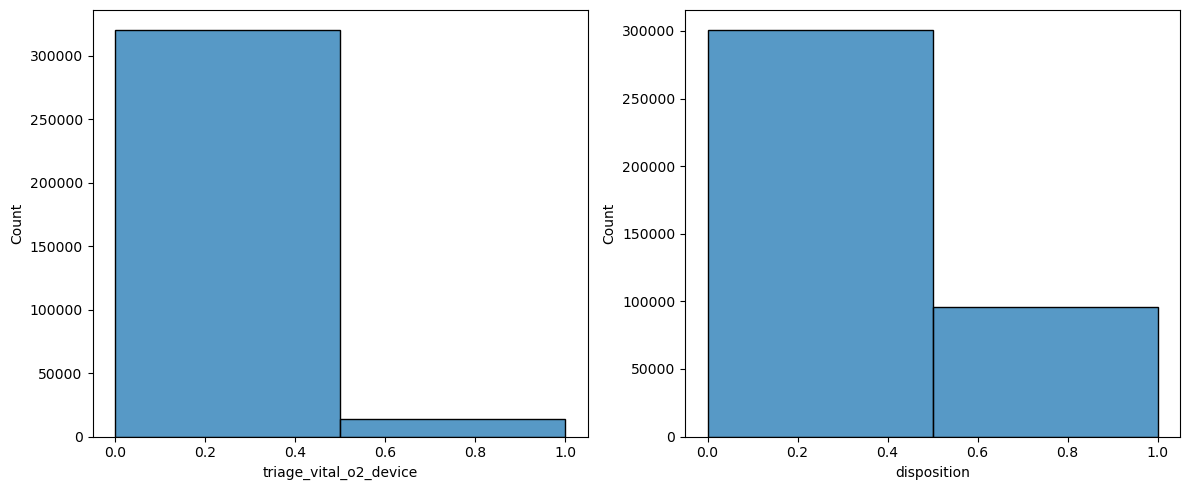

In [118]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(data=data2, x='triage_vital_o2_device', bins=2, ax =axes[0])
sns.histplot(data=data2, x='disposition', bins=2, ax =axes[1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


We use the ``SimpleImputer`` to fill the ``NaN`` data by the median of their 10 closet neighbour. 

In [126]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(strategy='median')
data2[['triage_vital_o2_device']] = imputer.fit_transform(data2[['triage_vital_o2_device']])

In [130]:
data2.isnull().sum()

Unnamed: 0                     0
dep_name                       0
esi                            0
age                            0
gender                         0
ethnicity                      0
race                          17
lang                           0
religion                  101601
maritalstatus                  0
employstatus                   0
insurance_status               0
disposition                    0
arrivalmode                 8387
arrivalmonth                   0
arrivalday                     0
arrivalhour_bin                0
triage_vital_hr             1565
previousdispo                  0
triage_vital_sbp            3417
triage_vital_dbp            3576
triage_vital_rr             6000
triage_vital_o2_device         0
triage_vital_temp          18498
n_edvisits                     0
n_admissions                   0
n_surgeries                    0
dtype: int64

### Missing values: ``religon`` and ``race``

For ``religion`` and ``race``, we fill the ``NaN`` with the world ``unknown``. 

In [133]:
data2['religion'] = data2['religion'].fillna("unknown")
data2['race'] = data2['race'].fillna("unknown")

In [165]:
data2.isnull().sum()

Unnamed: 0                    0
dep_name                      0
esi                           0
age                           0
gender                        0
ethnicity                     0
race                          0
lang                          0
religion                      0
maritalstatus                 0
employstatus                  0
insurance_status              0
disposition                   0
arrivalmode                8387
arrivalmonth                  0
arrivalday                    0
arrivalhour_bin               0
triage_vital_hr            1565
previousdispo                 0
triage_vital_sbp           3417
triage_vital_dbp           3576
triage_vital_rr            6000
triage_vital_o2_device        0
triage_vital_temp         18498
n_edvisits                    0
n_admissions                  0
n_surgeries                   0
dtype: int64

### Missing values: the rest

We are removing all remaining missing values since they constitute a negligible amount of data.

In [139]:
data3 = data2.dropna()

In [151]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361961 entries, 0 to 560484
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              361961 non-null  int64  
 1   dep_name                361961 non-null  object 
 2   esi                     361961 non-null  float64
 3   age                     361961 non-null  float64
 4   gender                  361961 non-null  object 
 5   ethnicity               361961 non-null  object 
 6   race                    361961 non-null  object 
 7   lang                    361961 non-null  object 
 8   religion                361961 non-null  object 
 9   maritalstatus           361961 non-null  object 
 10  employstatus            361961 non-null  object 
 11  insurance_status        361961 non-null  object 
 12  disposition             361961 non-null  int64  
 13  arrivalmode             361961 non-null  object 
 14  arrivalmonth            3

## **Checking for duplicate** 


In [148]:
duplicate = data3.duplicated()
duplicate.sum()

0

## **Convert data types**

First we consider the columns ``arrivalmonth``, ``arrivalday``, ``arrivalhour_bin``.

In [159]:
print(data3['arrivalmonth'].unique())
print(data3['arrivalday'].unique())
print(data3['arrivalhour_bin'].unique())

['June' 'January' 'July' 'November' 'April' 'September' 'March' 'December'
 'February' 'May' 'October' 'August']
['Tuesday' 'Thursday' 'Monday' 'Wednesday' 'Saturday' 'Friday' 'Sunday']
['23-02' '15-18' '11-14' '07-10' '19-22' '03-06']


We convert the arrival month to numerical months. 

In [163]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 
    'May': 5, 'June': 6, 'July': 7, 'August': 8, 
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

data3['arrivalmonth'] = data3['arrivalmonth'].map(month_mapping)

data3['arrivalmonth'].unique()

/var/folders/ns/ldg2lqpn3gv6lxm55vph6x540000gn/T/ipykernel_1686/2325072130.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['arrivalmonth'] = data3['arrivalmonth'].map(month_mapping)


array([ 6,  1,  7, 11,  4,  9,  3, 12,  2,  5, 10,  8])

In [170]:
data3.to_csv("dataWrangled.csv")

# **Explotary Data Analysis (EDA)**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataEDA_raw = pd.read_csv("dataWrangled.csv")
dataEDA_raw.head()

,Unnamed: 0.1,Unnamed: 0,dep_name,esi,age,gender,ethnicity,race,lang,religion,...,triage_vital_hr,previousdispo,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions,n_surgeries
0,0,0,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,unknown,...,63.0,No previous dispo,146.0,85.0,18.0,0.0,97.0,0,0,1.0
1,1,1,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,...,83.0,No previous dispo,125.0,77.0,16.0,0.0,98.0,0,0,2.0
2,2,2,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,...,78.0,Discharge,134.0,78.0,16.0,0.0,97.8,1,0,2.0
3,4,4,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,...,101.0,Discharge,133.0,72.0,18.0,0.0,98.4,1,0,5.0
4,5,5,A,3.0,86.0,Female,Hispanic or Latino,Other,Other,Pentecostal,...,76.0,Admit,143.0,87.0,18.0,0.0,98.5,0,0,10.0


In [8]:
dataEDA = dataEDA_raw.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
dataEDA.head()

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,triage_vital_hr,previousdispo,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions,n_surgeries
0,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,unknown,Single,Full Time,...,63.0,No previous dispo,146.0,85.0,18.0,0.0,97.0,0,0,1.0
1,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,83.0,No previous dispo,125.0,77.0,16.0,0.0,98.0,0,0,2.0
2,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,78.0,Discharge,134.0,78.0,16.0,0.0,97.8,1,0,2.0
3,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,101.0,Discharge,133.0,72.0,18.0,0.0,98.4,1,0,5.0
4,A,3.0,86.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,76.0,Admit,143.0,87.0,18.0,0.0,98.5,0,0,10.0


In [10]:
dataEDA.describe()

,esi,age,disposition,arrivalmonth,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions,n_surgeries
count,361961.000000,361961.000000,361961.000000,361961.000000,361961.000000,361961.000000,361961.000000,361961.000000,361961.000000,361961.000000,361961.000000,361961.000000,361961.000000
mean,3.097070,46.619723,0.235749,6.284445,85.583938,133.388341,80.495839,17.606387,0.030724,98.090036,3.288376,0.765088,2.031036
std,0.806304,19.186076,0.424467,3.304477,16.519139,21.214449,13.788885,1.908529,0.172570,0.776688,8.529410,2.140914,2.529486
min,1.000000,18.000000,0.000000,1.000000,30.000000,51.000000,25.000000,8.000000,0.000000,90.000000,0.000000,0.000000,0.000000
25%,3.000000,30.000000,0.000000,4.000000,74.000000,119.000000,71.000000,16.000000,0.000000,97.700000,0.000000,0.000000,0.000000
50%,3.000000,45.000000,0.000000,6.000000,84.000000,131.000000,80.000000,18.000000,0.000000,98.100000,1.000000,0.000000,1.000000
75%,4.000000,59.000000,0.000000,9.000000,96.000000,145.000000,89.000000,18.000000,0.000000,98.400000,3.000000,1.000000,3.000000
max,5.000000,107.000000,1.000000,12.000000,280.000000,312.000000,190.000000,69.000000,1.000000,106.000000,372.000000,49.000000,37.000000


## **Handling outliers**

We first start with considering the numerical variables. 

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericEDA = dataEDA.select_dtypes(include=numerics)

Now we look at the boxplot of the numerical variables to find the outliers. 

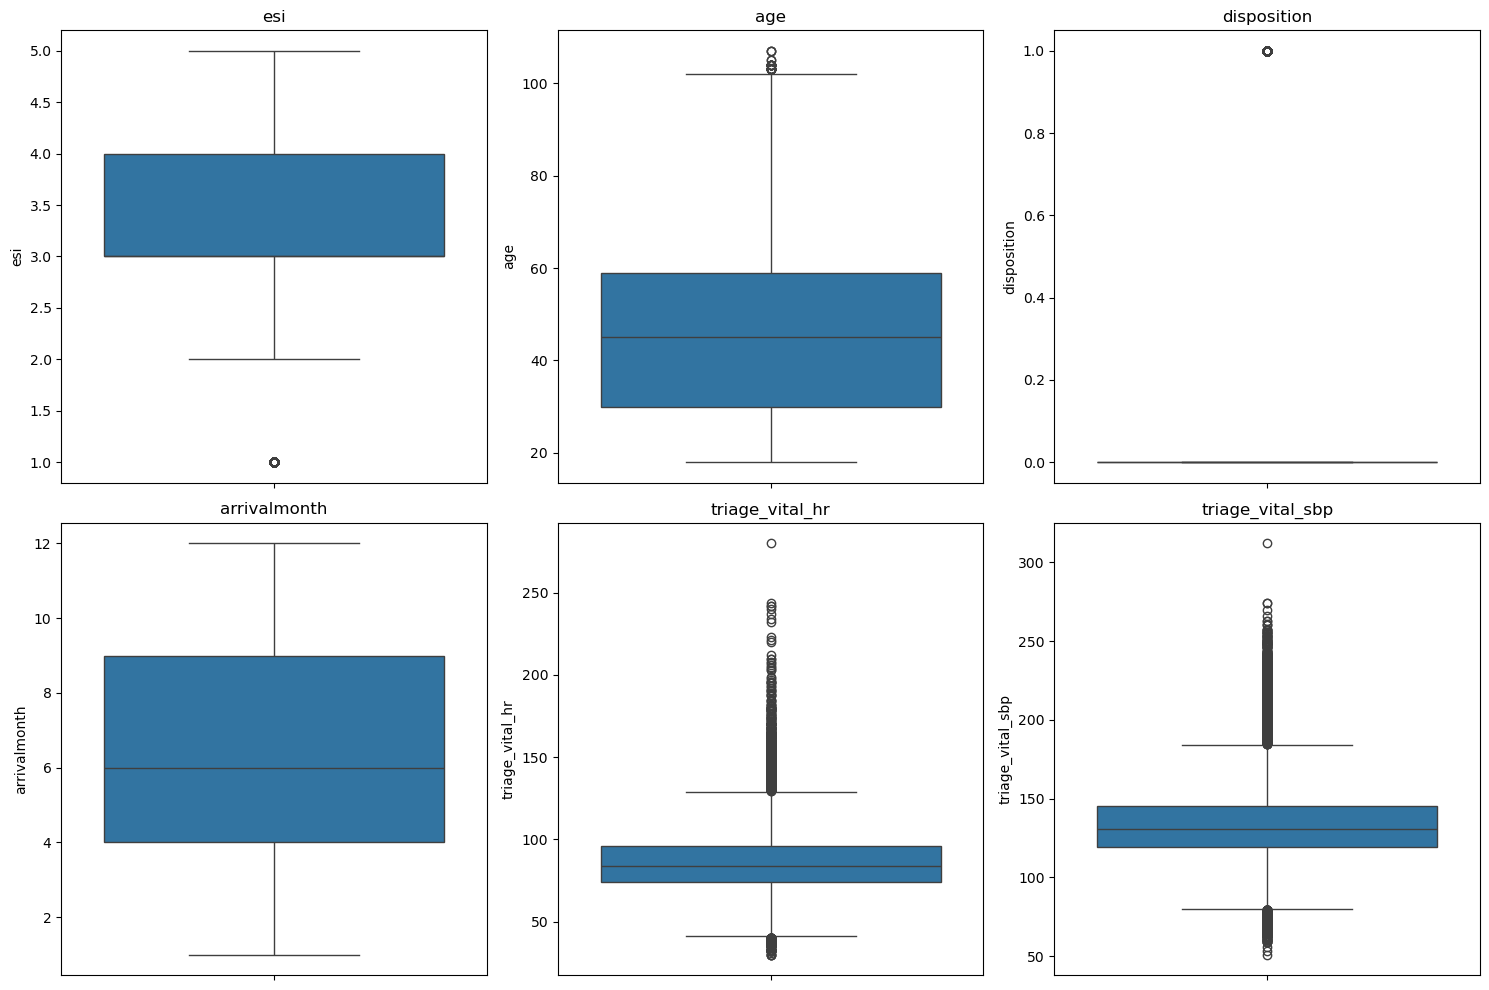

In [79]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

k = 0
for i in range(2):
    for j in range(3):
            sns.boxplot(data=numericEDA.iloc[:, k], ax=axes[i][j])
            axes[i][j].set_title(numericEDA.columns[k])
            k += 1

plt.tight_layout()
plt.show()

Considering the boxplot for ``triage_vital_hr``, the outliers are important as we can check about their ``disposition``. So, we first consider finding the outliers and then see their ``disposition`` status. 

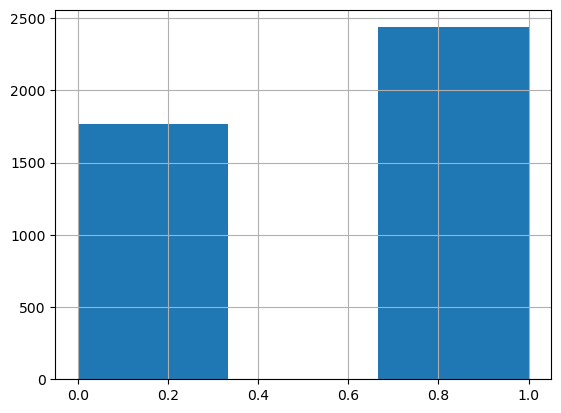

In [67]:
# List of outliers for "triage_vital_hr"

Q1 = numericEDA['triage_vital_hr'].quantile(0.25) 
Q3 = numericEDA['triage_vital_hr'].quantile(0.75) 

IQR = Q3 - Q1

lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

outliers_triage_vital_hr = numericEDA[ (numericEDA['triage_vital_hr'] > upper_bound) | (numericEDA['triage_vital_hr'] < lower_bound) ]
outliers_triage_vital_hr['disposition'].hist(bins=3)
plt.show()

Let's check the percentage of outliers that end up being by hospital in comparison with all of the data. 

In [74]:
admit_outlier_hr = (outliers_triage_vital_hr[outliers_triage_vital_hr['disposition']==1]['disposition'].sum()/ len(outliers_triage_vital_hr['disposition']))*100
print(f"The percenrage of the 'triage_vital_hr' outliers that are addmitted is {admit_outlier_hr}.")

The percenrage of the 'triage_vital_hr' outliers that are addmitted is 57.972394098048554.


In [76]:
admit_patient = (numericEDA['disposition'].sum()/ len(numericEDA['disposition']))*100
print(f"The percenrage of addmitted patients is {admit_patient}.")

The percenrage of addmitted patients is 23.57491552957363.


We can see that there is a considerable difference between the percentage of admitted outliers of ``triage_vital_hr`` and total addmitted patients. 

Let analyse ``triage_vital_sbp`` in the same way. 

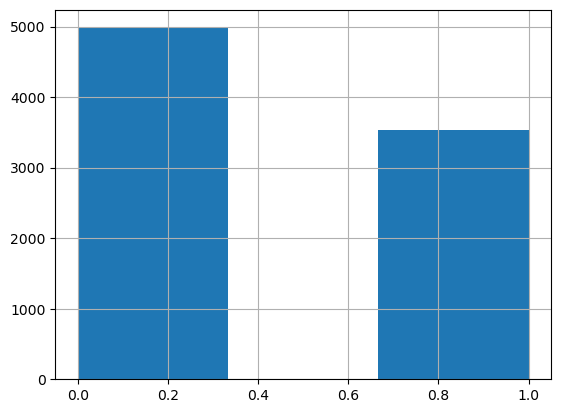

In [86]:
# List of outliers for "triage_vital_sbp"

Q1 = numericEDA['triage_vital_sbp'].quantile(0.25) 
Q3 = numericEDA['triage_vital_sbp'].quantile(0.75) 

IQR = Q3 - Q1

lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

outliers_triage_vital_sbp = numericEDA[ (numericEDA['triage_vital_sbp'] > upper_bound) | (numericEDA['triage_vital_sbp'] < lower_bound) ]
outliers_triage_vital_sbp['disposition'].hist(bins=3)
plt.show()

In [88]:
admit_outlier_sbp = (outliers_triage_vital_sbp[outliers_triage_vital_sbp['disposition']==1]['disposition'].sum()/ len(outliers_triage_vital_sbp['disposition']))*100
print(f"The percenrage of the 'triage_vital_hr' outliers that are addmitted is {admit_outlier_sbp}.")

The percenrage of the 'triage_vital_hr' outliers that are addmitted is 41.45940872829657.


Still the difference is considerable. This makes sense as intruitivly the outliers are more probable that be admitted. 

## **Distribution Plots**

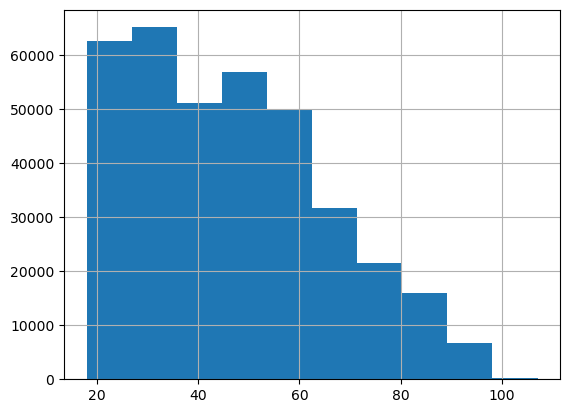

In [106]:
dataEDA['age'].hist()
plt.show()

The population of the younger people is more than that of the older, so this histogram makes sense. However, now we should see if older people are getting more admitted to the hospital. In order to do that, we look at the scatter plot of the ``disposition`` with respect to age. 

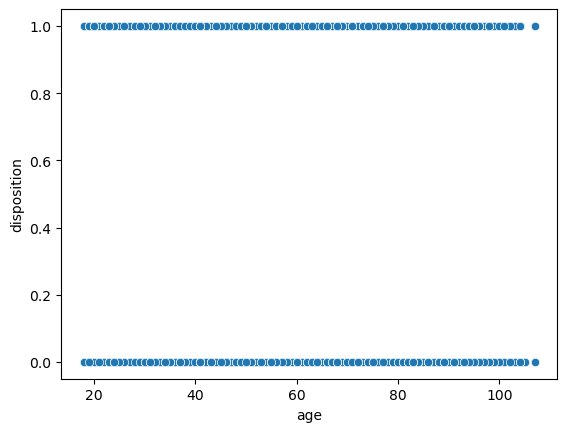

In [103]:
sns.scatterplot(data=dataEDA, x= 'age', y='disposition')
plt.show()

The above plot doesn't give that much information, so we look at the histogram of the age of all the patient that has been admitted. 

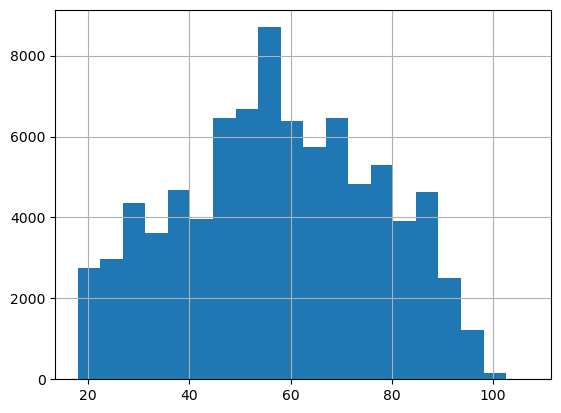

In [110]:
dataEDA[dataEDA['disposition'] ==1]['age'].hist(bins=20)
plt.show()

It looks like a normal distribution; let's divide the ages into several age bins and then check the percentage of the patients in each bin who have been admitted.

<Axes: >

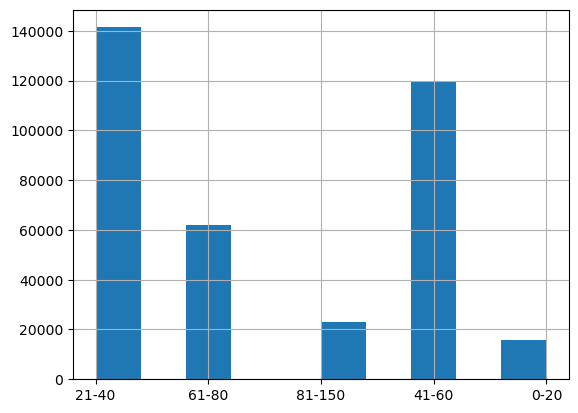

In [125]:
dataEDA['age_bin'] = pd.cut(dataEDA['age'], bins=[0, 20, 40, 60, 80, 150], labels=['0-20', '21-40', '41-60', '61-80', '81-150'])

dataEDA['age_bin'].hist()

In [127]:
dict_bin = {}
for label in ['0-20', '21-40', '41-60', '61-80', '81-150']:
    addmited_number = dataEDA[(dataEDA['age_bin'] == label) & (dataEDA['disposition'] == 1)]['disposition'].sum()
    total = len(dataEDA[dataEDA['age_bin'] == label])
    print(f"percentage of the people of the group age {label} that has been admitted is {addmited_number/total}.")
    dict_bin[label] = [addmited_number/total]
df_bin = pd.DataFrame(dict_bin)
df_bin.head()   

percentage of the people of the group age 0-20 that has been admitted is 0.0876549456109284.
percentage of the people of the group age 21-40 that has been admitted is 0.12029500986430394.
percentage of the people of the group age 41-60 that has been admitted is 0.24337222519390211.
percentage of the people of the group age 61-80 that has been admitted is 0.4085556163325718.
percentage of the people of the group age 81-150 that has been admitted is 0.541790263479323.


,0-20,21-40,41-60,61-80,81-150
0,0.087655,0.120295,0.243372,0.408556,0.54179


As it can be seen, the probability of an older patient ending up by admission is higher. 

To get more insight, we start by looking at the pair plot. 

## Pairplot and correlation matrix

We now are ready for some hypothesis testing. To get some insight we look at the pairplot as well as the correlation matrix. 

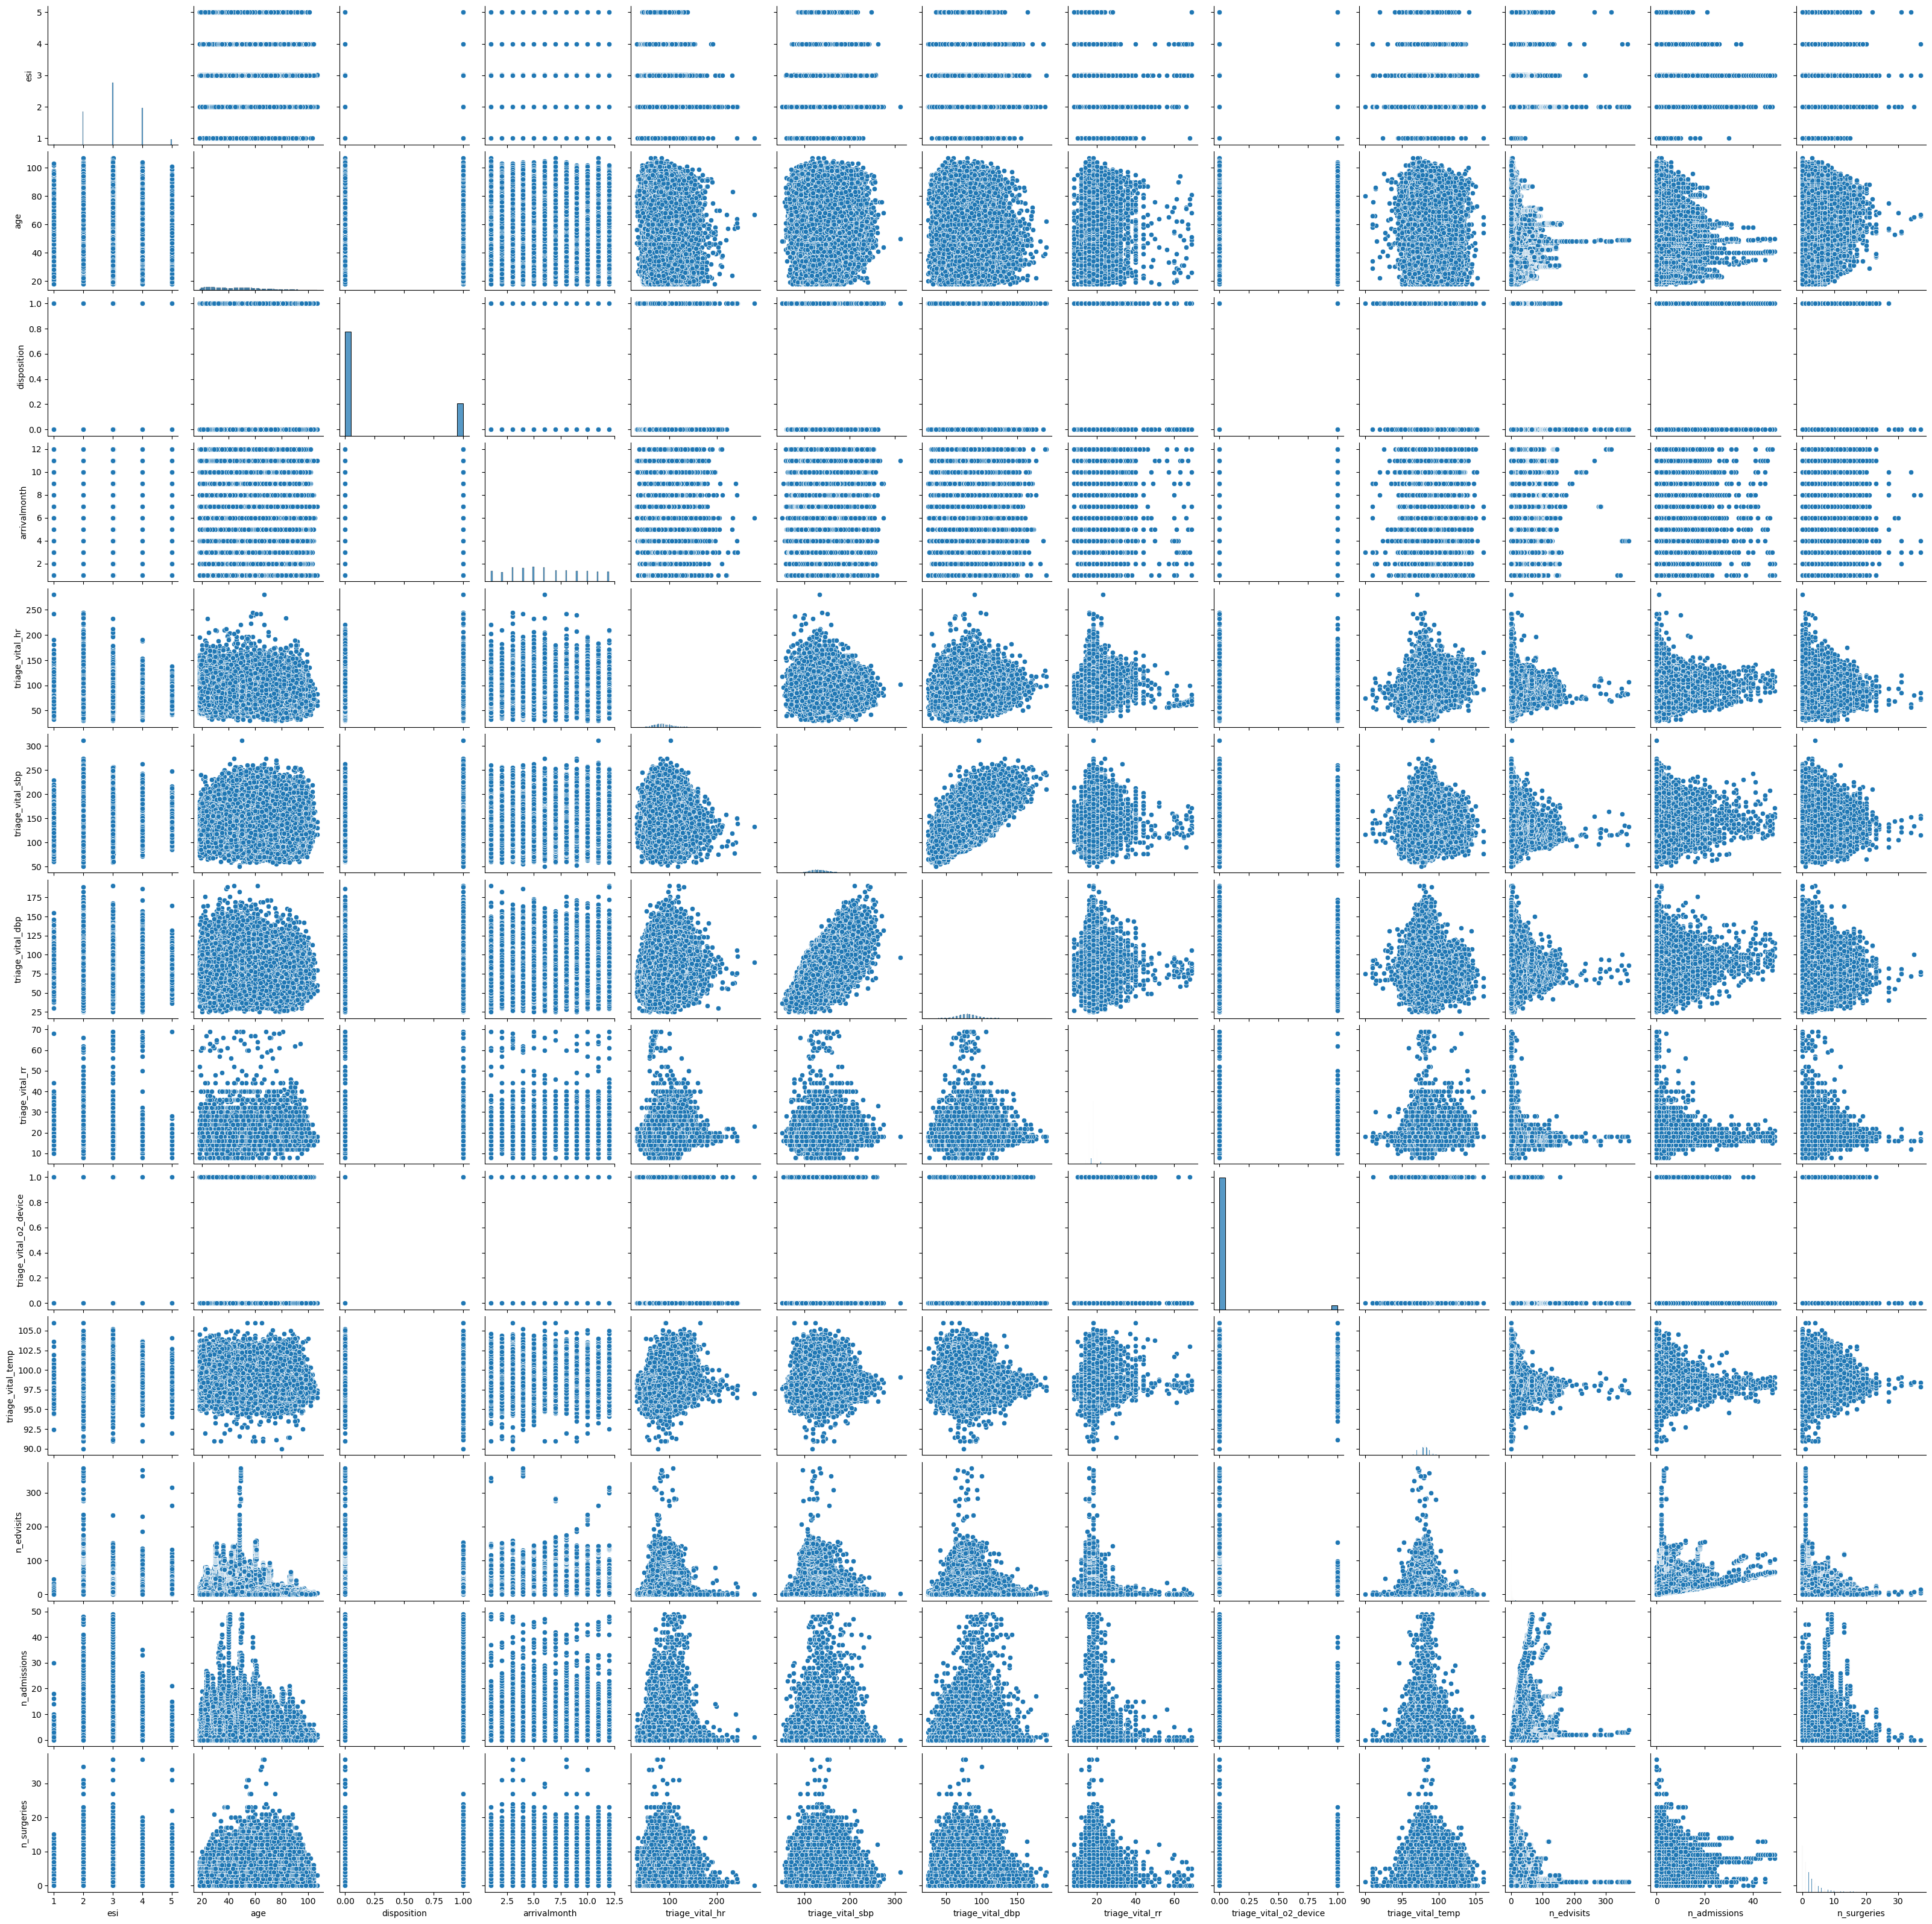

In [98]:
sns.pairplot(data = dataEDA)
plt.show()

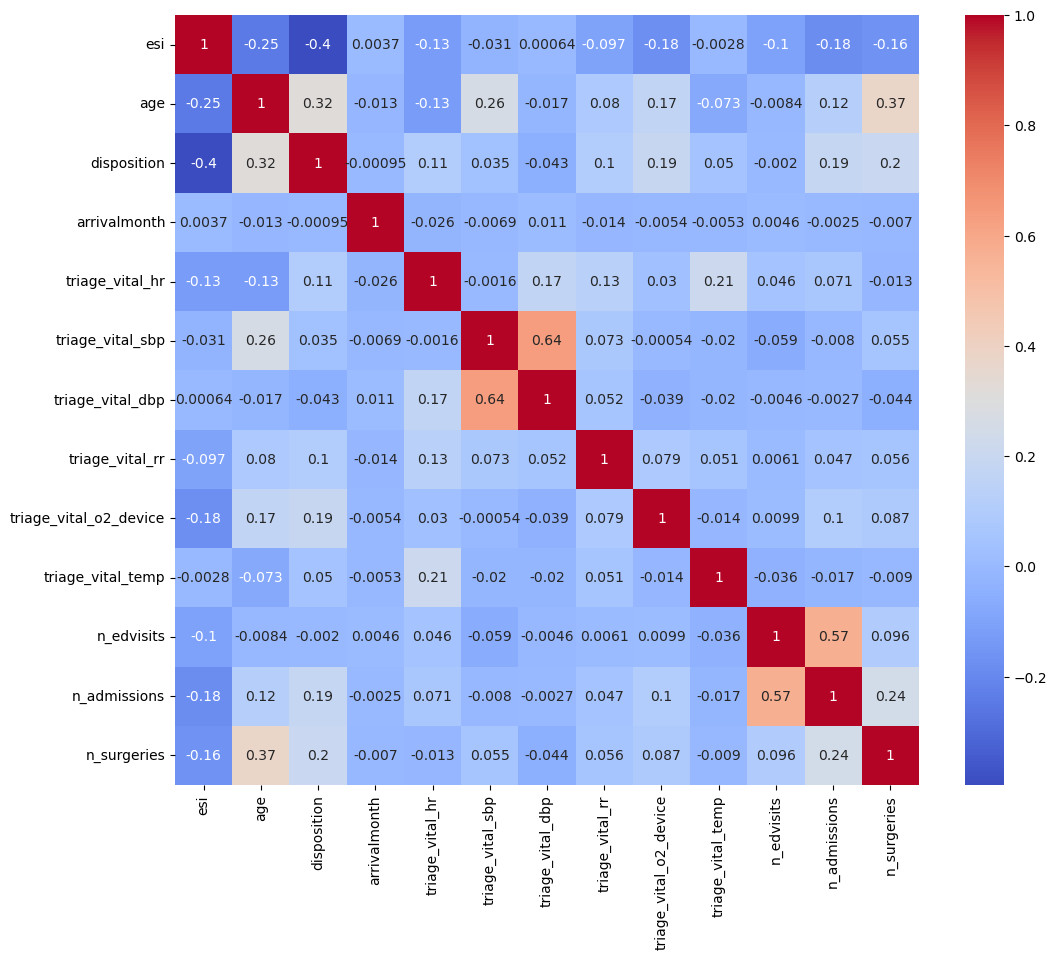

In [93]:
corr_mat = numericEDA.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot= True, cmap = 'coolwarm')
plt.show()

## Insurance Status and Admission Rate
**Hypothesis:**
- Null hypothesis (H0): Insurance status is independent of the admission rate.
- Alternative hypothesis (H1): Insurance status is associated with the admission rate.

**Test:**
- Chi-square test of independence.

In [139]:
import scipy.stats as stats

contingency_table = pd.crosstab(dataEDA['insurance_status'], dataEDA['disposition'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)


print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")



alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is an association between insurance status and admission rate.")
else:
    print("Fail to reject the null hypothesis: Insurance status is independent of the admission rate.")


Chi-square statistic: 25582.43706396587
P-value: 0.0
Reject the null hypothesis: There is an association between insurance status and admission rate.


Our test shows that there is a relation between them, so let's look at the percentages. 

In [142]:
dataEDA['insurance_status'].unique()

array(['Other', 'Commercial', 'Medicare', 'Medicaid', 'Self pay'],
      dtype=object)

In [146]:
dict_bin_insurance = {}
for label in ['Other', 'Commercial', 'Medicare', 'Medicaid', 'Self pay']:
    addmited_number = dataEDA[(dataEDA['insurance_status'] == label) & (dataEDA['disposition'] == 1)]['disposition'].sum()
    total = len(dataEDA[dataEDA['insurance_status'] == label])
    print(f"percentage of the people of the group insurance {label} that has been admitted is {addmited_number/total}.")
    dict_bin_insurance[label] = [addmited_number/total]
df_bin_insurance = pd.DataFrame(dict_bin_insurance)
df_bin_insurance.head() 

percentage of the people of the group insurance Other that has been admitted is 0.06819198568415671.
percentage of the people of the group insurance Commercial that has been admitted is 0.24855434191667078.
percentage of the people of the group insurance Medicare that has been admitted is 0.43421708517664653.
percentage of the people of the group insurance Medicaid that has been admitted is 0.16774184588249183.
percentage of the people of the group insurance Self pay that has been admitted is 0.9315196998123827.


,Other,Commercial,Medicare,Medicaid,Self pay
0,0.068192,0.248554,0.434217,0.167742,0.93152


There is a very interesting fact to note: the percentage of ``self-pay`` patients who are admitted is quite high—over 90 percent. This is largely because individuals without insurance typically only visit the emergency room when they are facing a very serious issue.

## Droping varaibles? 

As our target is ``disposition``, we set up chi-square tests for all our categorical data to see if they are independent to ``disposition``. 

In [168]:
objects = [x for x in list(dataEDA.dtypes) if x=='O']
ObjectEDA = dataEDA.select_dtypes(include=objects)
ObjectEDA.head()

,dep_name,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,arrivalmode,arrivalday,arrivalhour_bin,previousdispo
0,B,Male,Hispanic or Latino,White or Caucasian,English,unknown,Single,Full Time,Other,Walk-in,Tuesday,23-02,No previous dispo
1,B,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Car,Tuesday,15-18,No previous dispo
2,B,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Walk-in,Thursday,11-14,Discharge
3,A,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,Walk-in,Tuesday,07-10,Discharge
4,A,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,Walk-in,Monday,15-18,Admit


In [170]:
for x in ObjectEDA.columns: 
    contingency_table = pd.crosstab(dataEDA[x], dataEDA['disposition'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square statistic for {x}: {chi2}")
    print(f"P-value for {x}: {p}")
    alpha = 0.05
    if p < alpha:
        print(f"There is an association between {x} and admission rate.")
    else:
        print(f"{x} is independent of the admission rate.")

Chi-square statistic for dep_name: 6430.998907442448
P-value for dep_name: 0.0
There is an association between dep_name and admission rate.
Chi-square statistic for gender: 183.16768977996236
P-value for gender: 9.858654827069914e-42
There is an association between gender and admission rate.
Chi-square statistic for ethnicity: 2344.4126000197493
P-value for ethnicity: 0.0
There is an association between ethnicity and admission rate.
Chi-square statistic for race: 6582.102523043792
P-value for race: 0.0
There is an association between race and admission rate.
Chi-square statistic for lang: 208.5026841998777
P-value for lang: 2.9143594409926193e-47
There is an association between lang and admission rate.
Chi-square statistic for religion: 7928.290179492491
P-value for religion: 0.0
There is an association between religion and admission rate.
Chi-square statistic for maritalstatus: 15817.36008525756
P-value for maritalstatus: 0.0
There is an association between maritalstatus and admission

Even we may have by chi-square test that arrival day is not independent of the ``disposition``. however,  we check the percentage of people that are admitted on each day of the week. 

In [200]:
def addmitted_category(col):
    dict_bin = {}
    for label in dataEDA[col].unique():
        addmited_number = dataEDA[(dataEDA[col] == label) & (dataEDA['disposition'] == 1)]['disposition'].sum()
        total = len(dataEDA[dataEDA[col] == label])
        #print(f"percentage of the people of {label} that has been admitted is {addmited_number/total}.")
        dict_bin[label] = [addmited_number/total]
    df_bin = pd.DataFrame(dict_bin)
    return(df_bin)
    

In [202]:
addmitted_category('arrivalday').head()

,Tuesday,Thursday,Monday,Wednesday,Saturday,Friday,Sunday
0,0.241174,0.244927,0.244567,0.243284,0.213143,0.24878,0.211609


As we can see the percentage of people admitted on each day is the same so we drop this column. Let's check for other columns. 

In [206]:
for col in ObjectEDA.columns:
    print(addmitted_category(col).head())
    

          B         A         C
0  0.187559  0.281028  0.137916
       Male    Female
0  0.246459  0.227231
   Hispanic or Latino  Non-Hispanic  Patient Refused   Unknown
0            0.166831      0.252739         0.234536  0.170667
   White or Caucasian  Native Hawaiian or Other Pacific Islander     Other  \
0            0.293341                                   0.164234  0.167173   

   Black or African American  Patient Refused     Asian   Unknown  \
0                   0.186466         0.180403  0.235223  0.165639   

   American Indian or Alaska Native   unknown  
0                          0.276712  0.333333  
    English     Other
0  0.238998  0.203769
    unknown  Pentecostal  Catholic  Protestant  Christian     Other   Unknown  \
0  0.166482     0.232877  0.287259    0.309833   0.174507  0.298311  0.184769   

    Baptist  Methodist  Episcopal   Jewish    Muslim  Jehovah's Witness  
0  0.253437   0.336468   0.378757  0.38646  0.148172           0.245566  
     Single   Marri

Based on the above data and correlation matrix, we drop the following columns: 
``dep_name``, ``gender``, ``arrivalday``, ``arrivalhour_bin``, ``arrivalmonth``

In [211]:
dataEDA1 = dataEDA.drop(columns=['dep_name', 'gender', 'arrivalday', 'arrivalhour_bin', 'arrivalmonth'])
dataEDA1.head()

,esi,age,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,disposition,...,previousdispo,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2_device,triage_vital_temp,n_edvisits,n_admissions,n_surgeries,age_bin
0,4.0,40.0,Hispanic or Latino,White or Caucasian,English,unknown,Single,Full Time,Other,0,...,No previous dispo,146.0,85.0,18.0,0.0,97.0,0,0,1.0,21-40
1,4.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,0,...,No previous dispo,125.0,77.0,16.0,0.0,98.0,0,0,2.0,61-80
2,2.0,66.0,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,0,...,Discharge,134.0,78.0,16.0,0.0,97.8,1,0,2.0,61-80
3,3.0,84.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,1,...,Discharge,133.0,72.0,18.0,0.0,98.4,1,0,5.0,81-150
4,3.0,86.0,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,0,...,Admit,143.0,87.0,18.0,0.0,98.5,0,0,10.0,81-150


### Save data

In [214]:
dataEDA1.to_csv("dataEDAed.csv")